In [1]:
import geopandas as gpd
import numpy as np
from matplotlib import pyplot as plt

import shapely

In [2]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
spain_map = world[world.name=="Spain"]["geometry"].values

C:\Users\ruben\AppData\Local\Temp\ipykernel_13832\1030747155.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [3]:
def map2array(m: shapely.geometry.polygon.Polygon, normalize=True)-> np.array:
    v = np.array(m.exterior.coords)
    if normalize:
        v = v - v.min(axis=0)
        v = v / np.average(v.max(axis=0) - v.min(axis=0))
    z = (v[:,0] + 1j * v[:,1])
    
    return v, z

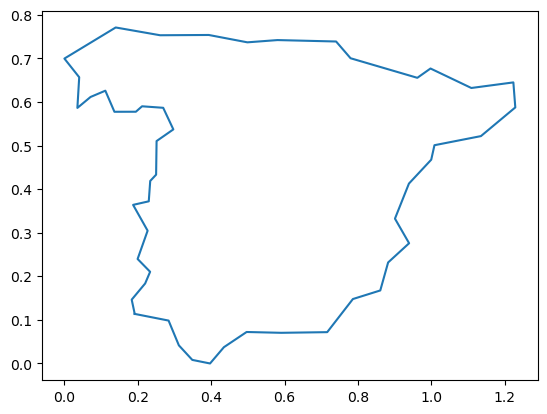

In [4]:
v, z = map2array(spain_map[0])
plt.plot(v[:,0], v[:,1])

plt.show()

In [5]:
m, _ = v.shape
m

51

In [6]:
w = z[:-1]
w

array([0.19167461+0.11376354j, 0.18343298+0.14649252j,
       0.22006441+0.18355812j, 0.23362849+0.21043088j,
       0.19954591+0.23981673j, 0.2268324 +0.30475879j,
       0.18723582+0.36401574j, 0.22994057+0.37215266j,
       0.23391198+0.41886967j, 0.24996361+0.43333529j,
       0.25123803+0.51045463j, 0.29690792+0.53721501j,
       0.2692792 +0.58679246j, 0.21168232+0.59024796j,
       0.19475979+0.57776677j, 0.13637629+0.57764929j,
       0.11159778+0.6260417j , 0.07126056+0.61163226j,
       0.03539276+0.58651408j, 0.04037298+0.6569114j ,
       0.        +0.69979492j, 0.13983435+0.77113209j,
       0.26078984+0.7532978j , 0.39349864+0.75392352j,
       0.49867322+0.73704185j, 0.58074468+0.74222639j,
       0.7404948 +0.73895477j, 0.77989217+0.70052535j,
       0.96184641+0.65560377j, 0.99778061+0.67697274j,
       1.10900041+0.63226059j, 1.22358121+0.6450738j ,
       1.22886791+0.5876557j , 1.13519892+0.5218223j ,
       1.0085481 +0.50093092j, 0.99973183+0.46767837j,
       0.9

## Parameter fitting
If we consider the periodic discrete function:
$$ f(t) = f(t + T) \ \ \ \ \ \forall t \in \{ 0, 1, 2, ..., T-1 \}$$

The N degree fourier series is defined as:
$$ f_{N}(t) = \sum_{n=-N}^{N} c_{n} e^{2 \pi i n \frac{t}{T}} $$

$$ c_{n} = \frac{1}{T} \int_{0}^{T} f(t) e^{-2 \pi i n \frac{t}{T}} dt 
= \frac{1}{T} \sum_{t=0}^{T-1} \int_{t}^{t+1} f(t) e^{-2 \pi i n \frac{t}{T}} dt $$

If we consider the approximation for a discrete function:
$ \int_{a}^{b} f(x) dx \approx (b - a) \frac{f(a)+f(b)}{2} $

$$ c_{n} 
\approx 
    \frac{1}{T} \sum_{t=0}^{T-1} \frac{f(t+1)e^{-2 \pi i n \frac{t+1}{T}}+f(t)e^{-2 \pi i n \frac{t}{T}}}{2} 
= 
    \frac{1}{T} \sum_{t=0}^{T-1} f(t)e^{-2 \pi i n \frac{t}{T}} $$
    

If we consider the 2 arrays:
$$ v_{i} = f(i) \ \ \ \ \ \forall i \in \{ 0, 1, 2, ..., T-1 \}$$
$$ w_{k} = e^{-2 \pi i n \frac{k}{T}} \ \ \ \ \ \forall k \in \{ 0, 1, 2, ..., T-1 \}$$


$$ c_{n} \approx \vec{v} \cdot \vec{w} $$


## Wave prediction









In [7]:
class FourierSeries:
    def __init__(self, N: int, wave: np.array):
        self.N = N
        self.wave = wave
        self.T = len(wave)
        
        self.coefs = np.zeros(2*N+1) * 1j
        for i in range(2*N+1):
            n = i - N
            arguments = -2 * np.pi * 1j * n * np.arange(self.T) / self.T
            self.coefs[i] = np.dot(wave, np.exp(arguments)) / self.T
        
        self.modules = np.absolute(self.coefs)
    
    
    def predict(self, time: np.array):
        m = len(time)
        wave = np.zeros(m) * 1j
        for i in range(m):
            arguments = -2 * np.pi * 1j * (np.arange(2*self.N+1)-self.N) * time[i] / self.T
            wave[i] = np.dot(self.coefs, np.exp(arguments))
        
        return wave
    
    
    def generate_animation(self, time: np.array):
        m = len(time)
        animation = np.zeros((m, self.N*2+1)) * 1j
        for i in range(m):
            arguments = -2 * np.pi * 1j * (np.arange(2*self.N+1)-self.N) * time[i] / self.T
            animation[i, :] = self.coefs * np.exp(arguments)
        
        for j in range(self.N*2):
            animation[:, j+1] += animation[:, j]
            
        return animation

In [8]:
serie = FourierSeries(20, w)

In [9]:
serie.N

20

In [10]:
np.absolute(serie.coefs)

array([1.88210041e-03, 1.67943293e-03, 2.49266321e-03, 3.10006049e-03,
       2.70512368e-03, 4.93576481e-03, 5.13310261e-03, 2.39707368e-03,
       3.64249511e-03, 8.73815495e-03, 1.20203093e-02, 1.09641336e-03,
       5.73010718e-04, 1.31173744e-02, 1.74813425e-02, 1.18869846e-02,
       2.03525217e-02, 4.47856413e-02, 1.16760586e-01, 3.96776312e-01,
       6.51369214e-01, 5.87392611e-02, 9.80292207e-02, 3.63417247e-02,
       9.36784141e-03, 1.81463479e-02, 1.26177874e-02, 1.15399462e-02,
       6.22302631e-03, 5.29976559e-03, 2.29308898e-03, 2.46767733e-03,
       4.83664333e-03, 3.00537885e-03, 7.51104571e-04, 7.13043385e-03,
       2.04114578e-03, 4.09817082e-03, 2.18107177e-03, 2.13498803e-03,
       5.13761410e-03])

In [11]:
a = serie.predict(np.arange(500)/10)
a

array([0.19388668+0.11512442j, 0.20077933+0.11399643j,
       0.20850633+0.11299073j, 0.21692404+0.11200824j,
       0.22586666+0.11094464j, 0.23515175+0.10969537j,
       0.24458662+0.10816085j, 0.25397544+0.10625156j,
       0.26312675+0.10389266j, 0.27186106+0.10102806j,
       0.28001815+0.09762356j, 0.28746366+0.09366882j,
       0.29409479+0.08917828j, 0.29984462+0.08419069j,
       0.3046849 +0.07876744j, 0.30862713+0.07298971j,
       0.31172182+0.06695453j, 0.31405589+0.0607702j ,
       0.31574837+0.05455093j, 0.31694455+0.04841145j,
       0.31780883+0.04246153j, 0.31851665+0.03680096j,
       0.31924589+0.03151516j, 0.32016812+0.02667173j,
       0.32144024+0.02231806j, 0.32319689+0.01848032j,
       0.32554397+0.01516359j, 0.32855377+0.01235337j,
       0.33226178+0.01001825j, 0.3366655 +0.00811353j,
       0.34172526+0.00658568j, 0.34736694+0.00537715j,
       0.35348663+0.00443142j, 0.35995671+0.00369777j,
       0.36663331+0.00313563j, 0.37336448+0.00271802j,
       0.3

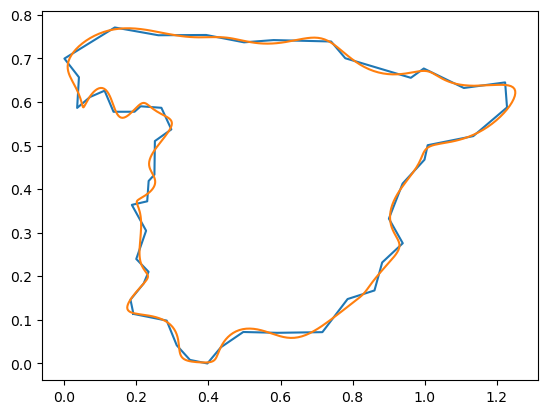

In [12]:
plt.plot(v[:,0], v[:,1])
plt.plot(a.real, a.imag)

plt.show()

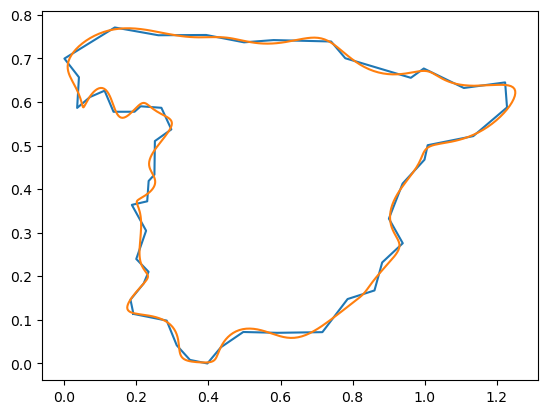

In [13]:
b = serie.generate_animation(np.arange(500)/10)

plt.plot(v[:,0], v[:,1])
plt.plot(b[:, -1].real, b[:, -1].imag)

plt.show()

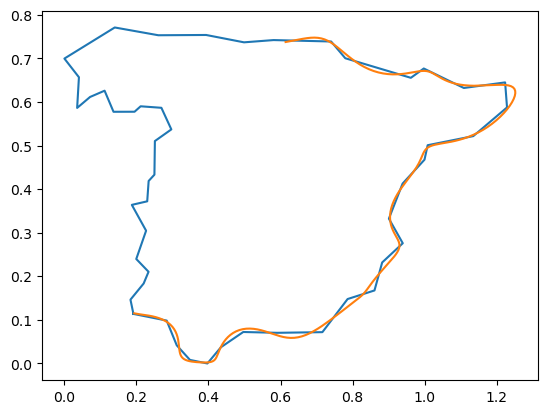

In [26]:
plt.plot(v[:,0], v[:,1])

t = int(len(b)/2) 
plt.plot(b[:t, -1].real, b[:t, -1].imag)
plt.show()

In [14]:
b[0,:]
serie.modules

array([1.88210041e-03, 1.67943293e-03, 2.49266321e-03, 3.10006049e-03,
       2.70512368e-03, 4.93576481e-03, 5.13310261e-03, 2.39707368e-03,
       3.64249511e-03, 8.73815495e-03, 1.20203093e-02, 1.09641336e-03,
       5.73010718e-04, 1.31173744e-02, 1.74813425e-02, 1.18869846e-02,
       2.03525217e-02, 4.47856413e-02, 1.16760586e-01, 3.96776312e-01,
       6.51369214e-01, 5.87392611e-02, 9.80292207e-02, 3.63417247e-02,
       9.36784141e-03, 1.81463479e-02, 1.26177874e-02, 1.15399462e-02,
       6.22302631e-03, 5.29976559e-03, 2.29308898e-03, 2.46767733e-03,
       4.83664333e-03, 3.00537885e-03, 7.51104571e-04, 7.13043385e-03,
       2.04114578e-03, 4.09817082e-03, 2.18107177e-03, 2.13498803e-03,
       5.13761410e-03])

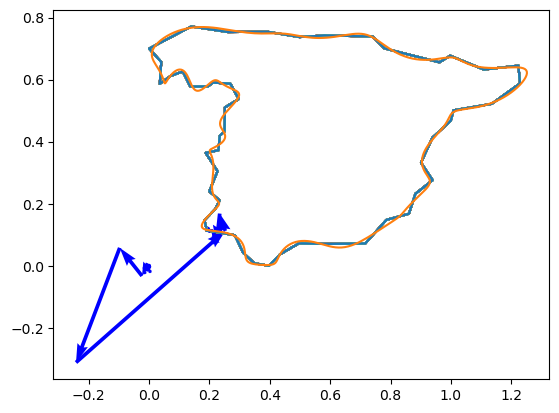

In [24]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

prev = np.array([0, 0])
for i in range(len(b[0,:])):
    actual = np.array([b[0, i].real, b[0, i].imag])
    ax.quiver(prev[0], prev[1], (actual-prev)[0], (actual-prev)[1], angles='xy', scale_units='xy', scale=1, color='b')
    prev = actual


plt.plot(v[:,0], v[:,1])
plt.plot(b[:, -1].real, b[:, -1].imag)

plt.show()

(-1.0, 4.0)

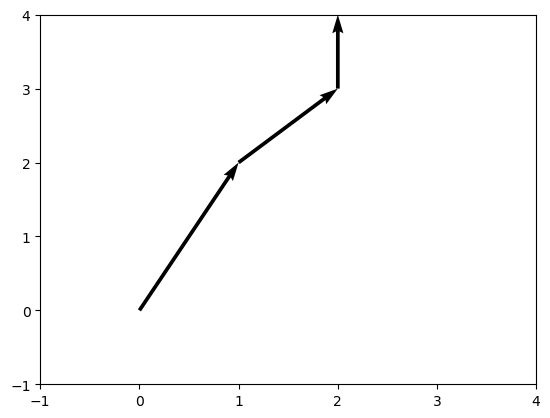

In [19]:
fig, ax = plt.subplots()

ax.quiver(0, 0, 1, 2, angles='xy', scale_units='xy', scale=1)
ax.quiver(1, 2, 1, 1, angles='xy', scale_units='xy', scale=1)
ax.quiver(2, 3, 0, 1, angles='xy', scale_units='xy', scale=1)

plt.xlim(-1, 4)
plt.ylim(-1, 4)

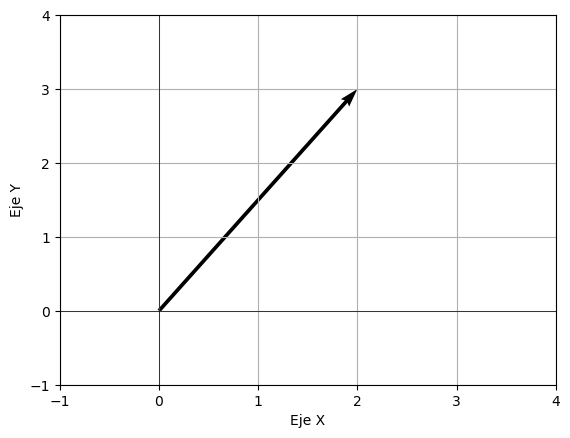

In [276]:
import matplotlib.pyplot as plt

# Coordenadas del vector
x = 2
y = 3

# Crear la figura y el subplot
fig, ax = plt.subplots()

# Plotear el vector como una flecha desde el origen hasta (x, y)
ax.quiver(0, 0, x, y, angles='xy', scale_units='xy', scale=1)

# Establecer los límites del gráfico
plt.xlim(-1, 4)
plt.ylim(-1, 4)

# Etiquetas de los ejes
plt.xlabel('Eje X')
plt.ylabel('Eje Y')

# Mostrar el gráfico
plt.grid()
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.show()

C:\Users\ruben\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


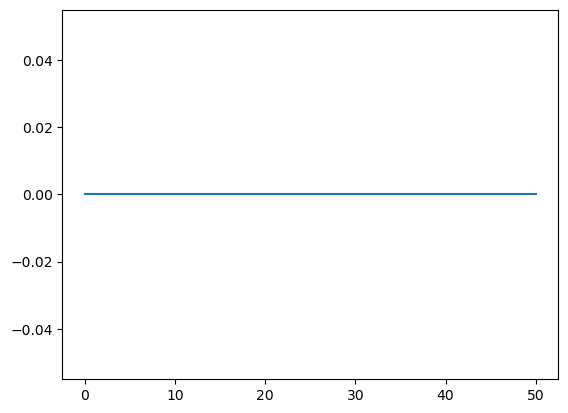

In [178]:
plt.plot(vals)

In [71]:
v = map2array(spain_map[0])
m, n = v.shape

if n!=2:
    raise Exception("Shape not well defined")

In [165]:
T = len(z)
T

51

In [168]:
c = np.zeros(11)
c

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [175]:
N  = 5
for i in range(2*N+1):
    print(i, i-N)

0 -5
1 -4
2 -3
3 -2
4 -1
5 0
6 1
7 2
8 3
9 4
10 5


In [103]:
np.average(v.max(axis=0) - v.min(axis=0))

10.116927693725362

In [104]:
v.max(axis=0) - v.min(axis=0)

array([12.43236776,  7.80148763])

In [74]:
np.array(spain_map[0].exterior.coords)

array([[-7.45372555, 37.09778758],
       [-7.53710548, 37.42890432],
       [-7.16650794, 37.80389435],
       [-7.02928118, 38.07576407],
       [-7.37409217, 38.37305858],
       [-7.09803667, 39.03007274],
       [-7.49863237, 39.62957103],
       [-7.06659156, 39.71189159],
       [-7.02641313, 40.18452424],
       [-6.86401994, 40.33087189],
       [-6.85112667, 41.11108267],
       [-6.38908769, 41.3818155 ],
       [-6.66860552, 41.88338695],
       [-7.25130897, 41.91834606],
       [-7.42251299, 41.79207469],
       [-8.01317461, 41.79088614],
       [-8.26385698, 42.28046865],
       [-8.67194577, 42.13468944],
       [-9.03481767, 41.88057058],
       [-8.98443315, 42.59277517],
       [-9.39288367, 43.02662466],
       [-7.97818966, 43.74833771],
       [-6.75449175, 43.56790945],
       [-5.41188636, 43.57423981],
       [-4.34784278, 43.40344921],
       [-3.5175317 , 43.45590078],
       [-1.90135128, 43.42280203],
       [-1.50277096, 43.03401439],
       [ 0.33804691,

C:\Users\ruben\anaconda3\lib\site-packages\matplotlib\animation.py:887: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


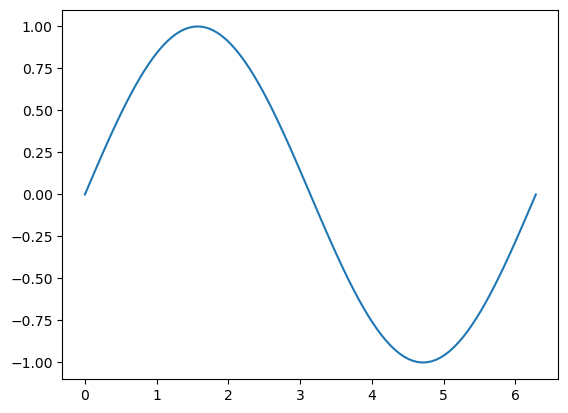

In [28]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

# Crear datos para la animación
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x)

# Crear la figura y el eje
fig, ax = plt.subplots()
line, = ax.plot(x, y)

# Función para actualizar la animación en cada frame
def update(frame):
    # Cambiar los datos de la línea para el siguiente frame
    line.set_ydata(np.sin(x + frame * 0.1))
    return line,

# Crear la animación
ani = FuncAnimation(fig, update, frames=100, interval=50)

# Mostrar la animación
plt.show()